In [6]:
import csv
import pandas as pd

In [1]:
! wget https://raw.githubusercontent.com/valentinedum/room_occupancy_estimation/refs/heads/main/data/Occupancy_Estimation_transformed.csv


--2025-06-19 14:28:00--  https://raw.githubusercontent.com/valentinedum/room_occupancy_estimation/refs/heads/main/data/Occupancy_Estimation_transformed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2602979 (2.5M) [text/plain]
Saving to: ‘Occupancy_Estimation_transformed.csv’

Occupancy_Estimatio 100%[===================>]   2.48M  8.43MB/s    in 0.3s    

2025-06-19 14:28:00 (8.43 MB/s) - ‘Occupancy_Estimation_transformed.csv’ saved [2602979/2602979]



In [2]:
! wget https://raw.githubusercontent.com/valentinedum/room_occupancy_estimation/refs/heads/main/data/Occupancy_Estimation_target.csv

--2025-06-19 14:30:27--  https://raw.githubusercontent.com/valentinedum/room_occupancy_estimation/refs/heads/main/data/Occupancy_Estimation_target.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20279 (20K) [text/plain]
Saving to: ‘Occupancy_Estimation_target.csv’

Occupancy_Estimatio 100%[===================>]  19.80K  --.-KB/s    in 0.007s  

2025-06-19 14:30:27 (2.66 MB/s) - ‘Occupancy_Estimation_target.csv’ saved [20279/20279]



In [9]:
y = pd.read_csv('Occupancy_Estimation_target.csv')
X_scaled = pd.read_csv('Occupancy_Estimation_transformed.csv')

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
U, Sigma, Vt = np.linalg.svd(X_train)

Text(0.5, 1.0, 'Normalized variance explained of X_train')

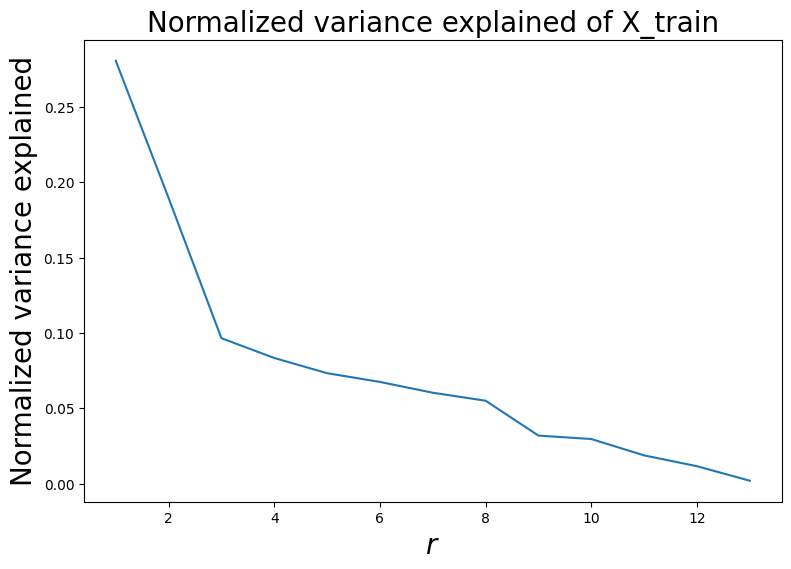

In [16]:
Sigma_squared = np.square(Sigma)
total_variance = sum(Sigma_squared)

### Plotting
fig = plt.figure(figsize=(9,6))
plt.plot(range(1,1+len(Sigma_squared)),Sigma_squared/total_variance)
plt.xlabel(r'$r$',size=20)
plt.ylabel(r'Normalized variance explained',size=20)
plt.title(r'Normalized variance explained of X_train',size=20)

Text(0.5, 1.0, 'Cumulative normalized variance explained of X_train')

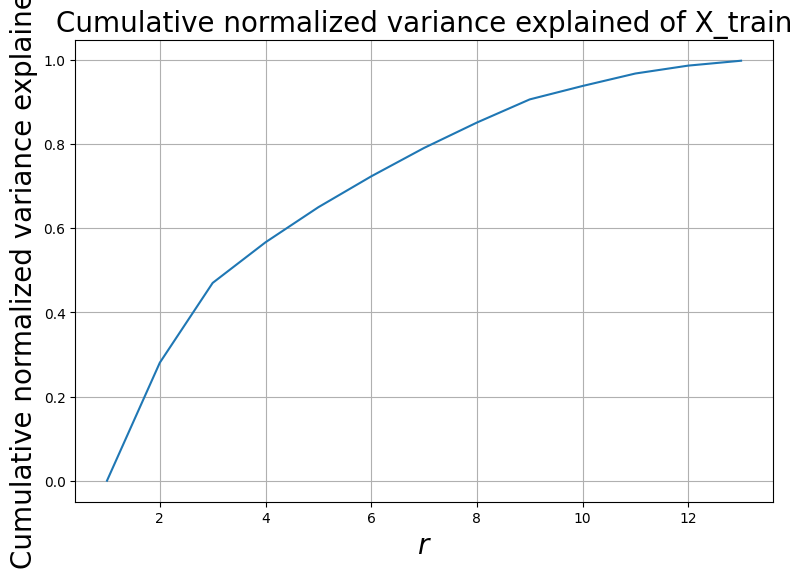

In [17]:
cumul = [ sum(Sigma_squared[0:i]/total_variance) for i in range(len(Sigma_squared))]

### Plotting
fig = plt.figure(figsize=(9,6))
plt.plot(range(1,1+len(cumul)),cumul)
plt.xlabel(r'$r$',size=20)
plt.ylabel(r'Cumulative normalized variance explained',size=20)
plt.grid(visible=True)
plt.title(r'Cumulative normalized variance explained of X_train',size=20)

In [38]:
r = 12

In [39]:
V = Vt.T  # We are interested in V (while the Vt given by linalg.svd was
          # the transpose of V)
V_r = V[:, :r] # Take the first k columns
X_train_reduced = X_train.dot(V_r)
X_test_reduced = X_test.dot(V_r)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
clf.fit(X_train_reduced, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [42]:
y_pred = clf.predict(X_test_reduced)
y_pred

array([0, 0, 0, ..., 3, 0, 0])

In [43]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
from pandas.plotting import scatter_matrix

In [44]:
accuracy_simple = accuracy_score(y_pred, y_test)
print(accuracy_simple)
f1_simple = f1_score(y_test, y_pred, average='macro')
print(f1_simple)

0.9782823297137216
0.9319256874865973


In [45]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1646
           1       0.91      0.93      0.92        92
           2       0.95      0.87      0.91       149
           3       0.87      0.94      0.90       139

    accuracy                           0.98      2026
   macro avg       0.93      0.93      0.93      2026
weighted avg       0.98      0.98      0.98      2026



In [47]:
!wget "https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py"


--2025-06-19 14:46:19--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]  12.72K  --.-KB/s    in 0.003s  

2025-06-19 14:46:19 (4.13 MB/s) - ‘visualization.py’ saved [13023/13023]



In [48]:
from visualization import plot_conf_mat

Normalized confusion matrix
[[0.99392467 0.         0.         0.00607533]
 [0.         0.93478261 0.06521739 0.        ]
 [0.00671141 0.05369128 0.87248322 0.06711409]
 [0.05755396 0.         0.00719424 0.9352518 ]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

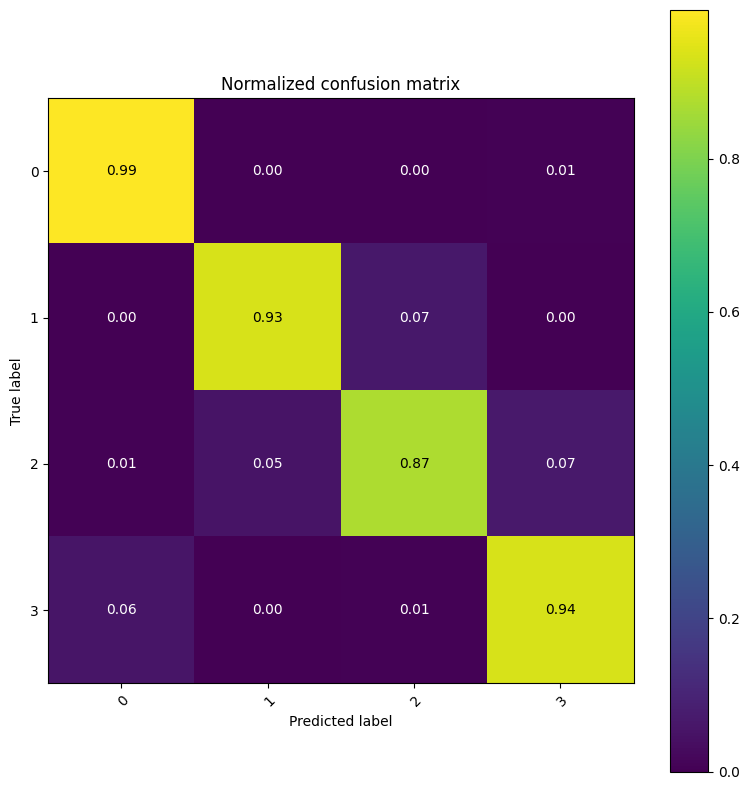

In [53]:
plot_conf_mat(y_test, y_pred, class_names=np.array(sorted(y_test['Room_Occupancy_Count'].unique())))